## **Distances and Angles between Images**

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [1]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

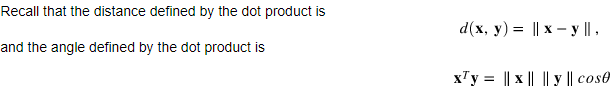

In [2]:
def distance(x, y):
    """Compute distance between two vectors x, y using the dot product"""
    x = np.array(x, dtype=np.float).ravel() # ravel() "flattens" the ndarray
    y = np.array(y, dtype=np.float).ravel()
#     distance = -1
    distance = np.linalg.norm(x-y)
    return distance


def angle(x, y):
    """Compute the angle between two vectors x, y using the dot product"""
    angle = np.arccos(np.dot(x, y) / np.sqrt(np.dot(x.T,x) * np.dot(y.T,y)))
    return angle


def pairwise_distance_matrix(X, Y):
    """Compute the pairwise distance between rows of X and rows of Y

    Arguments
    ----------
    X: ndarray of size (N, D)
    Y: ndarray of size (M, D)
    
    Returns
    --------
    D: matrix of shape (N, M), each entry D[i,j] is the distance between
    X[i,:] and Y[j,:] using the dot product.
    """
    N, D = X.shape
    M, _ = Y.shape
    distance_matrix = np.zeros((N, M), dtype=np.float)
    for i in range(N):
        for j in range(M):
            distance_matrix[i, j] = distance(X[i], Y[j])
    return distance_matrix

In [6]:
def plot_vector(v, w):
    """Plot two vectors `v` and `w` of dimension 2"""
    fig = plt.figure(figsize=(4,4))
    ax = fig.gca()
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.grid()
    ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');
    ax.arrow(0, 0, w[0], w[1], head_width=0.05, head_length=0.1, 
             length_includes_head=True, linewidth=2, color='r');

In [9]:
# Some sanity checks, you may want to have more interesting test cases to test your implementation
a = np.array([1,0])
b = np.array([0,1])
np.testing.assert_almost_equal(distance(a, b), np.sqrt(2))
assert((angle(a,b) / (np.pi * 2) * 360.) == 90)
print('correct')

correct


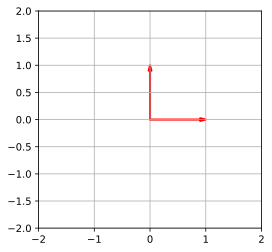

In [10]:

plot_vector(b, a)

In [28]:
import sklearn
import sklearn.datasets
from sklearn.datasets import fetch_openml
from ipywidgets import interact

MNIST = fetch_openml('mnist_784', data_home='./MNIST')

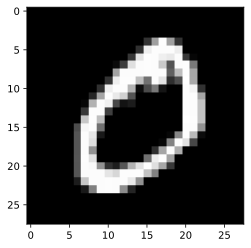

In [82]:
#plt.imshow(MNIST.data[MNIST.target==0].reshape(0,28,28)[0], cmap='gray');
plt.imshow(MNIST.data[1].reshape(-1,28,28)[0], cmap='gray')


#.reshape(-1,28,28)[1]


But we have the following questions:

What does it mean for two digits in the MNIST dataset to be different by our distance function?
Furthermore, how are different classes of digits different for MNIST digits? Let's find out!



For the first question, we can see just how the distance between digits compare among all distances for the first 500 digits;



In [83]:
distances = []
for i in range(len(MNIST.data[:500])):
    for j in range(len(MNIST.data[:500])):
        distances.append(distance(MNIST.data[i], MNIST.data[j]))

In [84]:
@interact(first=(0, 499), second=(0, 499), continuous_update=False)
def show_img(first, second):
    plt.figure(figsize=(8,4))
    f = MNIST.data[first].reshape(28, 28)
    s = MNIST.data[second].reshape(28, 28)
    
    ax0 = plt.subplot2grid((2, 2), (0, 0))
    ax1 = plt.subplot2grid((2, 2), (1, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)
    
    #plt.imshow(np.hstack([f,s]), cmap='gray')
    ax0.imshow(f, cmap='gray')
    ax1.imshow(s, cmap='gray')
    ax2.hist(np.array(distances), bins=50)
    d = distance(f, s)
    ax2.axvline(x=d, ymin=0, ymax=40000, color='C4', linewidth=4)
    ax2.text(0, 46000, "Distance is {:.2f}".format(d), size=12)
    ax2.set(xlabel='distance', ylabel='number of images')
    plt.show()

interactive(children=(IntSlider(value=249, description='first', max=499), IntSlider(value=249, description='se…

In [86]:
def most_similar_image():
    """Find the index of the digit, among all MNIST digits (excluding the first),
       that is the closest to the first image in the dataset, your answer should be a single integer

       Note:
       Use another cell to write some code snippets to find out this index.
       Then fill it in here. The autograder does not have access to the MNIST dataset,
       so any mentions of MNIST inside this will fail.
    """
    most_similar_index = 61
    return most_similar_index

In [90]:
means = {}
for n in np.unique(MNIST.target).astype(np.int):
    means[n] = np.mean(MNIST.data[MNIST.target==n], axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [91]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))         

for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        AG[i, j] = -1 # Complete this
for i in [0,1,2,3,4,5,6,7,8,9] :
    MD[i, i]= 100000000000000

print(MD.shape)
print(110 - np.argmin(MD)) # index

(10, 10)
109


In [92]:
MD = np.zeros((10, 10))
AG = np.zeros((10, 10))
for i in means.keys():
    for j in means.keys():
        MD[i, j] = distance(means[i], means[j])
        AG[i, j] = -1 # Complete this
for i in [0,1,2,3,4,5,6,7,8,9] :
    MD[i, i]= 100000000000000

print(MD)
print(np.argmin(MD))
print(np.unravel_index(MD.argmin(), MD.shape))

[[1.e+14    nan    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan 1.e+14    nan    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan 1.e+14    nan    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan 1.e+14    nan    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan 1.e+14    nan    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan 1.e+14    nan    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan 1.e+14    nan    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan 1.e+14    nan    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan 1.e+14    nan]
 [   nan    nan    nan    nan    nan    nan    nan    nan    nan 1.e+14]]
1
(0, 1)


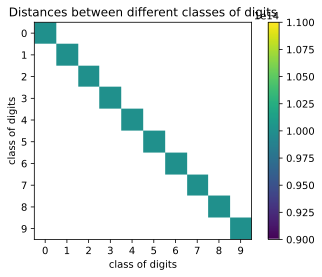

In [93]:

fig, ax = plt.subplots()
grid = ax.imshow(MD, interpolation='nearest')
ax.set(title='Distances between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show()

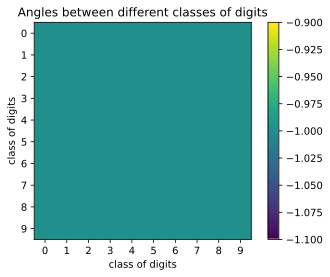

In [94]:
fig, ax = plt.subplots()
grid = ax.imshow(AG, interpolation='nearest')
ax.set(title='Angles between different classes of digits',
       xticks=range(10), 
       xlabel='class of digits',
       ylabel='class of digits',
       yticks=range(10))
fig.colorbar(grid)
plt.show();

## ** K Nearest Neighbors**


In this section, we will explore the KNN classification algorithm. A classification algorithm takes input some data and use the data to determine which class (category) this piece of data belongs to.

flower

As a motivating example, consider the iris flower dataset. The dataset consists of 150 data points where each data point is a feature vector $\boldsymbol x \in \mathbb{R}^4$ describing the attribute of a flower in the dataset, the four dimensions represent

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
and the corresponding target $y \in \mathbb{R}$ describes the class of the flower. There are 3 classes of flowers in this dataset.

Iris Setosa
Iris Versicolour
Iris Virginica

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
print('x shape is {}'.format(iris.data.shape))
print('y shape is {}'.format(iris.target.shape))

x shape is (150, 4)
y shape is (150,)


In [96]:
X = iris.data[:, :2] # I  use first two features for simplicity
y = iris.target

No handles with labels found to put in legend.


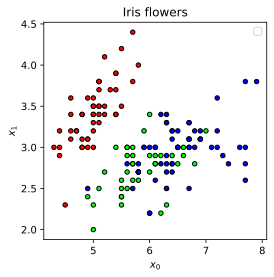

In [97]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, ax = plt.subplots(figsize=(4,4))

ax.scatter(X[:,0], X[:,1], c=y,
           cmap=cmap_bold, edgecolor='k', 
           s=20);
ax.legend()
ax.set(xlabel='$x_0$', ylabel='$x_1$', title='Iris flowers');

The intuition behind the KNN algorithm is quite simple: assuming we have some training set of flowers $(\boldsymbol{X},\boldsymbol{y})$ which we know the features and which classes the flowers in the training set belong to. Now suppose we are predicting the class for an unseen flower $\boldsymbol{x}_{test}$. To do this we

Compute its distance with all flowers in the training set.
Find the $K$ "closest" flowers in the training set by our distance meature.
From the $K$ flowers, find the "majority class" $y_{test}$ these $K$ flowers belong to. You can think of this as the $K$ flowers "voting" for a class that $\boldsymbol{x}_{test}$ should belong to.
Predict the class of the unseen flower as $y_{test}$.
To implement KNN, you will need to use your implementation of pairwise_distance_matrix to compute pairwise distances between data points in the dataset.

In [98]:
def KNN(k, X, y, Xtest):
    """K nearest neighbors
    Arguments
    ---------
    k: int using k nearest neighbors.
    X: the training set
    y: the classes
    Xtest: the test set which we want to predict the classes

    Returns
    -------
    ypred: predicted classes for Xtest
    
    """
    N, D = X.shape
    M, _ = Xtest.shape
    num_classes = len(np.unique(y))
    
    # 1. Compute distance with all flowers
    distance = pairwise_distance_matrix(X,Xtest) # EDIT THIS to use "pairwise_distance_matrix"

    # 2. Find indices for the k closest flowers
    idx = np.argsort(distance.T, axis=1)[:, :K]
    
    # 3. Vote for the major class
    ypred = np.zeros((M, num_classes))

    for m in range(M):
        klasses = y[idx[m]]    
        for k in np.unique(klasses):
            ypred[m, k] = len(klasses[klasses == k]) / K

    return np.argmax(ypred, axis=1)

Let's take a closer look at how KNN behaves for the iris dataset.

In the cell below, we select a grid of points and use our KNN algorithm to predict the classes for each of the point on the grid. the color of the mesh shows the prediction of KNN at a particular point on the grid.

Pay close attension to the boundaries (in fact, they are called decision boundaries since points that lie on the boundaries can be predicted to either of the two classes on the left and right of the boundaries).

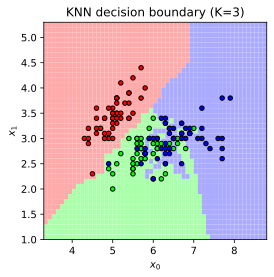

In [99]:
K = 3

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
step = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

ypred = []
data = np.array([xx.ravel(), yy.ravel()]).T
ypred = KNN(K, X, y, data)

fig, ax = plt.subplots(figsize=(4,4))

ax.pcolormesh(xx, yy, ypred.reshape(xx.shape), cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold, edgecolor='k', s=20);
ax.set(xlabel='$x_0$', ylabel='$x_1$', title='KNN decision boundary (K={})'.format(K));